# Bibliotecas

In [10]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Carregando os DataSet

### Customers

In [11]:
customers = pd.read_csv('olist_customers_dataset.csv', sep = ',')
customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers.shape

(99441, 5)

### Geolocation

In [13]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep = ',')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
geolocation.shape

(1000163, 5)

### Customers + Geolocation

In [15]:
first = pd.merge(customers, geolocation, how = 'inner', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
first.filter(['customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng'])

,customer_city,customer_state,geolocation_lat,geolocation_lng
0,franca,SP,-20.509897,-47.397866
1,franca,SP,-20.497396,-47.399241
2,franca,SP,-20.510459,-47.399553
3,franca,SP,-20.480940,-47.394161
4,franca,SP,-20.515413,-47.398194
...,...,...,...,...
15083450,aparecida de goiania,GO,-16.821866,-49.244027
15083451,aparecida de goiania,GO,-16.821866,-49.244027
15083452,aparecida de goiania,GO,-16.822945,-49.244615
15083453,passo fundo,RS,-28.226596,-52.467505


### Order Items

In [16]:
order_items = pd.read_csv('olist_order_items_dataset.csv', sep = ',')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
order_items.shape

(112650, 7)

### Payments

In [18]:
order_payment = pd.read_csv('olist_order_payments_dataset.csv', sep = ',')
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [19]:
order_payment.shape

(103886, 5)

### Reviews

In [20]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
order_reviews.shape

(99224, 7)

### Orders

In [22]:
orders = pd.read_csv('olist_orders_dataset.csv', sep = ',')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
orders.shape

(99441, 8)

### Products

In [24]:
products = pd.read_csv('olist_products_dataset.csv', sep = ',')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
products.shape

(32951, 9)

### Sellers

In [26]:
sellers = pd.read_csv('olist_sellers_dataset.csv', sep = ',')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
sellers.shape

(3095, 4)

### Product Category

In [28]:
products_category = pd.read_csv('product_category_name_translation.csv', sep = ',')
products_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
products_category.shape

(71, 2)

### Respondendo algumas perguntas

#### 1 - Qual produto traz mais receita?

In [30]:
products.shape, order_items.shape

((32951, 9), (112650, 7))

In [31]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [32]:
newtable = pd.merge(products, order_items, how = 'left', on = 'product_id')
newtable.shape

(112650, 15)

In [33]:

top5 = newtable.filter(['product_id', 'product_category_name', 'price']).sort_values(by = 'price', ascending = False).head()
top5

,product_id,product_category_name,price
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,6735.0
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,6729.0
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,6499.0
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,4799.0
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,4690.0


Text(0.5, 0, 'Preço')

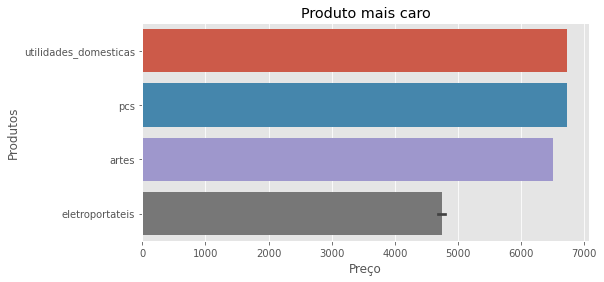

In [34]:
plt.figure(figsize = (8,4))
plt.title("Produto mais caro")
sns.barplot(x = top5.price, y = top5.product_category_name)
plt.ylabel("Produtos")
plt.xlabel("Preço")

##### No gráfico acima podemos ver que "utilidades domésticas" é categoria que traz o produto MAIS CARO

In [35]:
top5receita = newtable.groupby('product_category_name').sum('price').sort_values(by = 'price', ascending = False).head()
top5receita.filter(['product_category_name', 'price']).reset_index()

,product_category_name,price
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32


<AxesSubplot:title={'center':'TOP 5 produtos que trazem mais receitas'}, ylabel='product_category_name'>

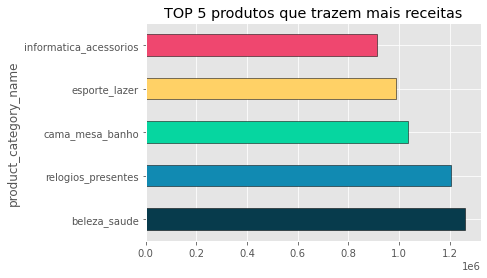

In [36]:
top5receita['price'].plot.barh(title = "TOP 5 produtos que trazem mais receitas", edgecolor = 'black', color = ['#073b4c', '#118ab2', '#06d6a0', '#ffd166', '#ef476f'])

##### No gráfico acima podemos ver que "beleza/saúde" é a categoria que traz MAIS RECEITA

In [37]:
top5maisvendidos = newtable['product_category_name'].value_counts().sort_values(ascending = False).head()
top5maisvendidos

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
Name: product_category_name, dtype: int64

<AxesSubplot:title={'center':'TOP 5 produtos mais vendidos'}>

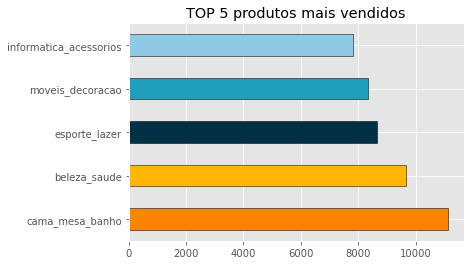

In [38]:
top5maisvendidos.plot.barh(title = 'TOP 5 produtos mais vendidos', edgecolor = 'black', color = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6'])

##### No gráfico acima podemos ver que "cama/mesa/banho" é a categoria que traz uma MAIOR QUANTIDADE DE VENDA

##### O que podemos entender a respeito disso?

##### Por mais que "cama/mesa/banho" seja a categoria que mais vende, não é a categoria que mais arrecada.

#### 2 - Qual região traz mais receita?

###### Tabelas a serem utilizadas: (customers, orders, order_items)

In [39]:
customers_orders = pd.merge(customers, orders, how = 'left', on = 'customer_id')
customers_orders_items = pd.merge(customers_orders, order_items, how = 'left', on = 'order_id')
final = customers_orders_items.filter(['customer_id', 'customer_city', 'price'])

In [40]:
final.isnull().sum()

customer_id        0
customer_city      0
price            775
dtype: int64

In [41]:
final.dropna(inplace = True)

In [42]:
regioes = final.groupby('customer_city').sum('price').sort_values(by = 'price', ascending = False)
regioes

,price
customer_city,
sao paulo,1914924.54
rio de janeiro,992538.86
belo horizonte,355611.13
brasilia,301920.25
curitiba,211738.06
...,...
jenipapo de minas,7.48
santo antonio do rio abaixo,6.00
senador jose porfirio,6.00


<AxesSubplot:title={'center':'TOP 5 regiões que mais trazem receita'}, ylabel='customer_city'>

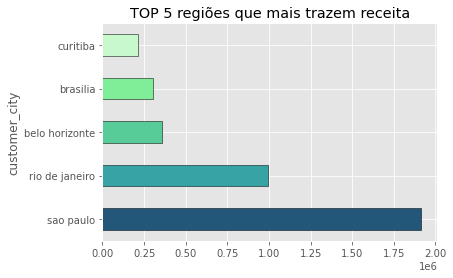

In [43]:
regioes['price'].head().plot.barh(title = 'TOP 5 regiões que mais trazem receita', edgecolor = 'black', color = ['#22577a', '#38a3a5', '#57cc99', '#80ed99', '#c7f9cc'])

##### No gráfico acima podemos ver que "São Paulo" é a região que mais traz receita

#### 3 - Qual a média de preço de cada categoria?

In [44]:
orders_products = pd.merge(order_items, products, how = 'left', on = 'product_id')
orders_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [45]:
orders_products_filter = orders_products.filter(['product_category_name', 'price'])

In [46]:
orders_final = orders_products_filter.groupby('product_category_name').mean().sort_values('price', ascending = False)
orders_final

,price
product_category_name,
pcs,1098.340542
portateis_casa_forno_e_cafe,624.285658
eletrodomesticos_2,476.124958
agro_industria_e_comercio,342.124858
instrumentos_musicais,281.616000
...,...
alimentos_bebidas,54.602446
cds_dvds_musicais,52.142857
fraldas_higiene,40.194615


<AxesSubplot:title={'center':'TOP 5 das categorias com médias mais altas'}, ylabel='product_category_name'>

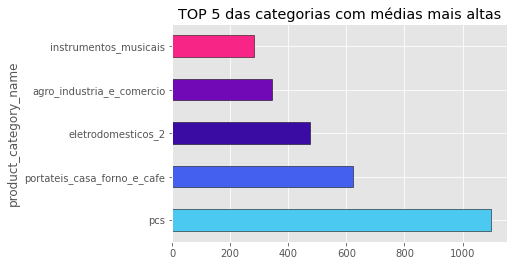

In [47]:
orders_final['price'].head().plot.barh(title = 'TOP 5 das categorias com médias mais altas', edgecolor = 'black', color = ['#4cc9f0', '#4361ee', '#3a0ca3', '#7209b7', '#f72585'])

##### No gráfico acima podemos ver que a categoria de "pcs" é categoria que tem a média mais elevada em seus preços